# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**AI-generated notebook**  
**Caution:** This notebook was automatically generated by AI and has not been fully verified by a human expert. Please use caution and review code and outputs carefully before basing any critical conclusions on the results herein.

## Overview

This notebook guides the user through exploring [Dandiset 001333 version 0.250327.2220](https://dandiarchive.org/dandiset/001333/0.250327.2220), the **Parkinson's Electrophysiological Signal Dataset (PESD)**. The dataset contains simulated electrophysiological signals from both healthy and parkinsonian subjects, with a focus on beta oscillations (13–30 Hz) in the subthalamic nucleus (STN) — a key pathological marker of Parkinson's Disease. 

The signals are stored in Neurodata Without Borders (NWB) format and include:
- **Beta ARV:** Average rectified voltage of beta-band LFP, frequency domain
- **LFP:** Local field potentials from the STN, time domain

For details, see the [accompanying paper on arXiv](https://arxiv.org/abs/2407.17756).

### Significance of Beta Oscillations in Parkinson's Disease
Beta oscillations (13–30 Hz) in the subthalamic nucleus (STN) have been shown to correlate with parkinsonian symptoms; excessive beta activity is regarded as a key pathological marker of PD, associated with motor dysfunction.

In this notebook you will:
- Explore the Dandiset metadata and assets via the DANDI API
- Load and inspect contents of an example NWB file (LFP data)
- Visualize the LFP signal and its spectral content, emphasizing the beta band
- Learn how to access the Beta ARV data and other files for further exploration
> **Note**: For brevity, we use minimal data loading per example to optimize speed with remote files. Also, only one file (healthy simulation) is explored, but the same code can be applied to parkinsonian cases for comparative study.

> **Important**: The goal is to illustrate how to access, explore, and visualize data from this Dandiset—not to perform exhaustive analysis or reach definitive scientific conclusions.

## Required packages

This notebook requires the following packages (assumed to be already installed):

- numpy
- matplotlib
- pandas
- pynwb
- h5py
- remfile
- dandi
- scipy

## Dandiset overview and asset listing

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and load Dandiset metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description:\n{metadata['description']}\n")
print(f"DOI citation: {metadata['citation']}")
print(f"Version: {metadata['version']}")
print(f"Contributor(s): {metadata['contributor']}")
print(f"License(s): {metadata['license']}\n")

# List the first 5 NWB files in the Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220
Description:
The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as the pathological biomarkers for PD symptoms. Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) from the Subthalamic Nucleus (STN). The ARV signals are in the frequency domain and LFP signals are in the time domain.

Beta ARV Signal: The controller beta values are determined by calculating the Average Rectified Value (ARV) of the beta band. This is achieved by fully rectifying the filtered LFP signal using a fourth-order Chebyshev band-pass 

## Selecting a file for exploration

For demonstration purposes, we will explore the following NWB file from the Dandiset:

**sub-healthy-simulated-lfp/sub-healthy-simulated-lfp_ses-162_ecephys.nwb**

- **DANDI asset id:** `00df5264-001b-4bb0-a987-0ddfb6058961`
- **Direct URL:** https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/

You can also open this NWB file in [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/&dandisetId=001333&dandisetVersion=draft) for interactive exploration.

## Loading the NWB file (remote streaming)

Below, we load the selected NWB file directly over HTTPS using PyNWB and remfile for streaming access (no download required).

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Identifier: {nwb.identifier}")
print(f"Experiment description: {nwb.experiment_description}")
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Subject species: {subject.species}")
print(f"Subject age: {subject.age}")
print(f"Subject description: {subject.description}")

Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session start time: 2025-03-27 16:53:27.603558-04:00
Identifier: 2feb8ac9-a70f-49f0-894b-7420f0d803cb
Experiment description: The PESD dataset is generated from a cortico-basal-ganglia network for a Parkinsonian computational model. The computational model of the cortico-basal-ganglia is originally presented by Fleming et al. in the article: 'Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression of Pathological Beta Oscillations in Parkinson's Disease'.
Subject ID: healthy-simulated-lfp
Subject species: Homo sapiens
Subject age: P0D
Subject description: This is a simulated dataset generated from a computational model.


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Basic structure of the NWB file

The NWB file contains processed LFP data from a simulated human STN model. Key metadata for this session is shown below:

In [3]:
from pandas import DataFrame
import pandas as pd

print("\nRelated publications:", nwb.related_publications)
print("Keywords:", nwb.keywords[:])
print("Lab:", getattr(nwb, "lab", ''))
print("Institution:", getattr(nwb, "institution", ''))
print("File creation date(s):", nwb.file_create_date)

# Preview of electrode table (small, 12 electrodes)
elec_df = nwb.electrodes.to_dataframe()
print("\nElectrode table (first 5 rows):")
print(elec_df.head())

# Short markdown summary for clarity
import IPython.display as disp

tbl_md = "| id | label | group_name | location |\n|---|---|---|---|\n"
for idx, row in elec_df.iterrows():
    tbl_md += f"| {idx} | {row['label']} | {row['group_name']} | {row['location']} |\n"
disp.display(disp.Markdown("""**Electrode configuration (12 total channels):**
Each label encodes the shank and electrode index (e.g., `shank0_elec0`). All electrodes are simulated and assigned to brain regions via group and location columns.
"""))
disp.display(disp.Markdown(tbl_md))


Related publications: ('https://arxiv.org/abs/2407.17756', 'DOI: 10.3389/fnins.2020.00166')
Keywords: ['ecephys' 'LFP' "Parkinson's Disease" 'Beta Band']
Lab: BrainX Lab
Institution: Michigan Technological University
File creation date(s): [datetime.datetime(2025, 3, 27, 16, 53, 27, 630470, tzinfo=tzoffset(None, -14400))]

Electrode table (first 5 rows):
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.ElectrodeGroup at 0x13891...     shank0  shank0_elec0  
1   sh

**Electrode configuration (12 total channels):**
Each label encodes the shank and electrode index (e.g., `shank0_elec0`). All electrodes are simulated and assigned to brain regions via group and location columns.


| id | label | group_name | location |
|---|---|---|---|
| 0 | shank0_elec0 | shank0 | Simulated Cortico-basal-ganglia network of brain |
| 1 | shank0_elec1 | shank0 | Simulated Cortico-basal-ganglia network of brain |
| 2 | shank0_elec2 | shank0 | Simulated Cortico-basal-ganglia network of brain |
| 3 | shank1_elec0 | shank1 | Simulated Cortico-basal-ganglia network of brain |
| 4 | shank1_elec1 | shank1 | Simulated Cortico-basal-ganglia network of brain |
| 5 | shank1_elec2 | shank1 | Simulated Cortico-basal-ganglia network of brain |
| 6 | shank2_elec0 | shank2 | Simulated Cortico-basal-ganglia network of brain |
| 7 | shank2_elec1 | shank2 | Simulated Cortico-basal-ganglia network of brain |
| 8 | shank2_elec2 | shank2 | Simulated Cortico-basal-ganglia network of brain |
| 9 | shank3_elec0 | shank3 | Simulated Cortico-basal-ganglia network of brain |
| 10 | shank3_elec1 | shank3 | Simulated Cortico-basal-ganglia network of brain |
| 11 | shank3_elec2 | shank3 | Simulated Cortico-basal-ganglia network of brain |


## Exploring the LFP data

The LFP data is found under `nwb.processing['ecephys'].data_interfaces['LFP'].electrical_series['LFP']`.
- **Shape:** 77,400 samples (single channel, time series)
- **Sampling rate:** 2,000 Hz
- **Unit:** volts

In [4]:
LFP = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["LFP"]
print(f"LFP dataset shape: {LFP.data.shape}, dtype: {LFP.data.dtype}")
print(f"LFP sampling rate: {LFP.rate} Hz")
print(f"LFP unit: {LFP.unit}")
N = LFP.data.shape[0]
sample_n = min(10_000, N)
d_sample = LFP.data[:sample_n]
print(f"First {sample_n} LFP data points: mean={d_sample.mean():.4g}, std={d_sample.std():.4g}, min={d_sample.min():.4g}, max={d_sample.max():.4g}")
print("First 10 data points:", d_sample[:10])

LFP dataset shape: (77400,), dtype: float64
LFP sampling rate: 2000.0 Hz
LFP unit: volts
First 10000 LFP data points: mean=-8.559e-05, std=0.0009295, min=-0.005047, max=0.006219
First 10 data points: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Visualizing a short segment of the LFP signal

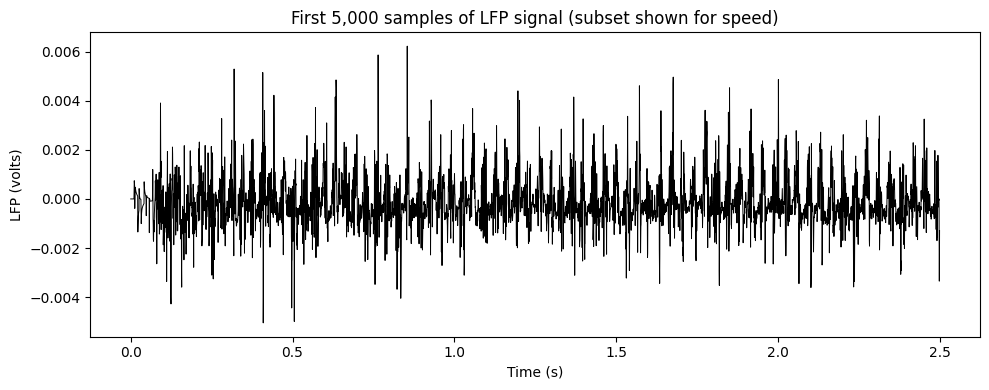

In [5]:
import numpy as np
import matplotlib.pyplot as plt

segment_len = 5000
# Only a subset plotted to avoid slowdowns (full LFP is much larger!)
lfp_seg = LFP.data[:segment_len]
time_seg = np.arange(segment_len) / LFP.rate

plt.figure(figsize=(10, 4))
plt.plot(time_seg, lfp_seg, color="k", linewidth=0.7)
plt.xlabel("Time (s)")
plt.ylabel(f"LFP ({LFP.unit})")
plt.title(f"First {segment_len:,} samples of LFP signal (subset shown for speed)")
plt.tight_layout()
plt.show()

The plot above shows clearly structured LFP fluctuations, consistent with plausible neurophysiological activity. The amplitude ranges from roughly -0.004 to 0.006 volts, and the timescale covers the first 2.5 seconds.

### Power spectral density (PSD) of the LFP signal

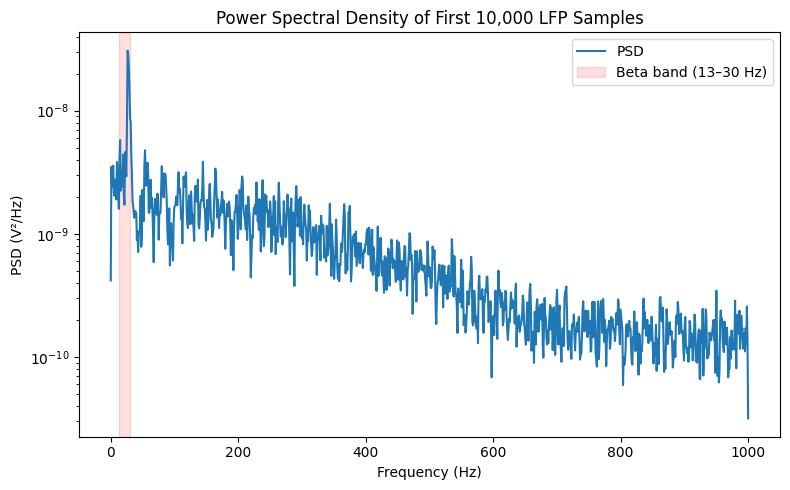

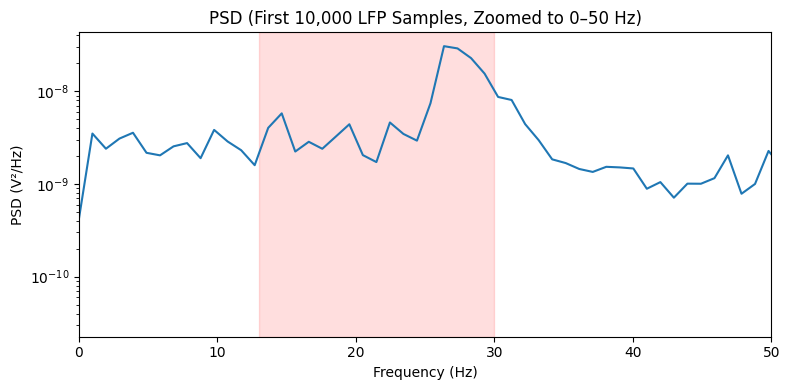

In [6]:
from scipy.signal import welch

# We'll use the first 10,000 samples for PSD estimation (to minimize remote bandwidth and keep things interactive)
n_psd = 10_000
f, Pxx = welch(LFP.data[:n_psd], fs=LFP.rate, nperseg=2048)

plt.figure(figsize=(8, 5))
plt.semilogy(f, Pxx, label="PSD")
plt.axvspan(13, 30, color='red', alpha=0.13, label="Beta band (13–30 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.title(f"Power Spectral Density of First {n_psd:,} LFP Samples")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: zoom in for better beta band visualization
plt.figure(figsize=(8, 4))
plt.semilogy(f, Pxx)
plt.axvspan(13, 30, color='red', alpha=0.13)
plt.xlim(0, 50)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.title("PSD (First 10,000 LFP Samples, Zoomed to 0–50 Hz)")
plt.tight_layout()
plt.show()

The PSD plot above shows a typical 1/f profile often observed in LFP recordings. Most power is concentrated at lower frequencies. The red shaded region highlights the beta band (13–30 Hz), which is of particular interest for Parkinson's disease research. In this example, there is no prominent beta peak, which is expected in healthy subjects—but comparing parkinsonian cases may reveal increased beta band activity. 

> **Note:** Only 10,000 samples are used here for PSD estimation to speed up analysis with remotely-streamed data.

## Accessing Beta ARV data

In addition to LFP, this dataset contains Beta Average Rectified Voltage (ARV) signals. To access this data, look within the `ecephys` processing module for a `Beta_ARV` interface. Here's how to inspect its presence and metadata:

In [7]:
# Demonstrate checking for Beta ARV in the current file
if "Beta_ARV" in nwb.processing["ecephys"].data_interfaces:
    beta_arv = nwb.processing["ecephys"].data_interfaces["Beta_ARV"]
    print("Beta_ARV found!")
    print("Beta_ARV description:", getattr(beta_arv, "description", ""))
    # Example: print shape/statistics if .data exists
    if hasattr(beta_arv, "data") and hasattr(beta_arv.data, "shape"):
        print("Beta ARV data shape:", beta_arv.data.shape)
        N = beta_arv.data.shape[0]
        preview = beta_arv.data[:min(10, N)]
        print("Preview Beta ARV:", preview)
    else:
        print("No data attribute on Beta_ARV interface.")
else:
    print("Beta_ARV interface not found in this file. You may need to explore other files.")

Beta_ARV interface not found in this file. You may need to explore other files.


To compare healthy and parkinsonian signals, repeat the data loading steps above using a parkinsonian NWB file. The Dandiset assets list includes such files, typically with `sub-parkinsonian-...` prefixes. Substitute the asset URL and ID accordingly, then compare the LFP and Beta ARV data and corresponding spectra/bandpowers.

*This notebook focuses on one healthy simulation for brevity, but the code is generic and can be applied to parkinsonian files for comparative analysis.*

## Summary and next steps

This notebook provided a guided exploration of the [PESD Dandiset](https://dandiarchive.org/dandiset/001333/0.250327.2220), focusing on:
- Key metadata and subject/session info for the Dandiset and one example NWB file
- Electrode group/channel structure and how to access this info programmatically
- Methods to plot a segment of the raw LFP and examine its frequency-domain characteristics

**Possible future directions:**
- Compare healthy vs. parkinsonian simulated files to look for differences in beta power or signal structure
- Explore the Beta ARV signals or other data interfaces in the dataset
- Analyze longer signals or average spectra over trials
- Investigate per-electrode signals or grouping further

> For more, you can interactively browse files in [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/&dandisetId=001333&dandisetVersion=draft)

---
 
**End of generated notebook. Remember to validate any code and interpretations as this notebook was AI-generated.**

In [8]:
io.close()
h5_file.close()
remote_file.close()